Uploading dataset

In [ ]:
import pandas as pd
data = pd.read_csv('/content/Unemployment in India.csv')

In [ ]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


Summarizing data

In [ ]:
data.shape

(768, 7)

In [ ]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [ ]:
data.info

<bound method DataFrame.info of              Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019    Monthly                              3.65   
1    Andhra Pradesh   30-06-2019    Monthly                              3.05   
2    Andhra Pradesh   31-07-2019    Monthly                              3.75   
3    Andhra Pradesh   31-08-2019    Monthly                              3.32   
4    Andhra Pradesh   30-09-2019    Monthly                              5.17   
..              ...          ...        ...                               ...   
749     West Bengal   29-02-2020    Monthly                              7.55   
750     West Bengal   31-03-2020    Monthly                              6.67   
751     West Bengal   30-04-2020    Monthly                             15.63   
752     West Bengal   31-05-2020    Monthly                             15.22   
753     West Bengal   30-06-2020    Monthly                              9.86

Checking null values and deleting it

In [ ]:
data.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [ ]:
data = data.drop_duplicates()

How many times a state occur in Unemployment rate column?

In [ ]:
state_count = data.groupby('Region').count()
print(state_count[' Estimated Unemployment Rate (%)'])

Region
Andhra Pradesh      28
Assam               26
Bihar               28
Chandigarh          12
Chhattisgarh        28
Delhi               28
Goa                 24
Gujarat             28
Haryana             28
Himachal Pradesh    28
Jammu & Kashmir     21
Jharkhand           28
Karnataka           28
Kerala              28
Madhya Pradesh      28
Maharashtra         28
Meghalaya           27
Odisha              28
Puducherry          26
Punjab              28
Rajasthan           28
Sikkim              17
Tamil Nadu          28
Telangana           28
Tripura             28
Uttar Pradesh       28
Uttarakhand         27
West Bengal         28
Name:  Estimated Unemployment Rate (%), dtype: int64


Which state has the maximum unemployment rate ?

In [ ]:
unemp_rate = data.groupby(['Region'])[' Estimated Unemployment Rate (%)'].max()
unemp_rate

Region
Andhra Pradesh      32.30
Assam               11.17
Bihar               58.77
Chandigarh          22.05
Chhattisgarh        27.07
Delhi               45.78
Goa                 25.20
Gujarat             25.94
Haryana             46.89
Himachal Pradesh    50.00
Jammu & Kashmir     24.06
Jharkhand           70.17
Karnataka           33.17
Kerala              30.28
Madhya Pradesh      40.49
Maharashtra         25.28
Meghalaya           17.39
Odisha              24.48
Puducherry          76.74
Punjab              40.59
Rajasthan           35.53
Sikkim              20.45
Tamil Nadu          53.19
Telangana           36.57
Tripura             43.64
Uttar Pradesh       32.06
Uttarakhand         17.36
West Bengal         18.43
Name:  Estimated Unemployment Rate (%), dtype: float64

Visualizing Unemployment rate in India

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-52-0086f3f41510>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-52-0086f3f41510>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


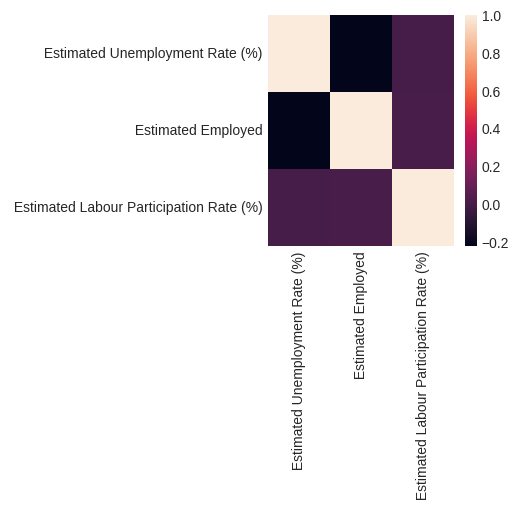

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(3, 3))
sns.heatmap(data.corr())
plt.show()

In [ ]:
import plotly.express as px
unemp = data[["Region", " Estimated Unemployment Rate (%)"]]
figure = px.sunburst(
    unemp, path=["Region"],
    values=" Estimated Unemployment Rate (%)",
    width=600, height=600, color_continuous_scale="RdY1Gn",
    title="Unemployment Rate in India")
figure.show()